In [1]:
import tensorflow as tf 
from keras.layers import Layer
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def preprocess(file_path):
    # read in img from file path
    byte_img = tf.io.read_file(file_path)
    # load in the img
    img = tf.io.decode_jpeg(byte_img)
    # Preprocessing steps - resizing the img to 100x100
    img = tf.image.resize(img, (100,100))
    # scale image between 1 & 0
    img = img/255.0
    return img

In [3]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embbedding):
        return tf.math.abs(input_embedding - validation_embbedding)

In [4]:
l1 = L1Dist()

In [5]:
# Reload model 
Anger_model = tf.keras.models.load_model("V/Jaffe_VGG_Anger.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [6]:
# Reload model 
Disgust_model = tf.keras.models.load_model("V/Jaffe_VGG_Disgust.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [7]:
# Reload model 
Fear_model = tf.keras.models.load_model("V/Jaffe_VGG_Fear.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [8]:
# Reload model 
Happy_model = tf.keras.models.load_model("V/Jaffe_VGG_Happy.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [9]:
# Reload model 
Neutral_model = tf.keras.models.load_model("V/Jaffe_VGG_Neutral.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [10]:
# Reload model 
Sad_model = tf.keras.models.load_model("V/Jaffe_VGG_Sad.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [11]:
# Reload model 
Surprise_model = tf.keras.models.load_model("V/Jaffe_VGG_Surprise.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [12]:
def Anger(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Anger"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 10)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Anger_model.predict([image, img])[0][0] for img in images]
    print(predictions) 
    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]
    print(labels)
    # Count the number of positive predictions
    positive_count = sum(labels)
    print(positive_count)
    return positive_count


In [13]:
def Disgust(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Disgust"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 10)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Disgust_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)
    
    return positive_count


In [14]:
def Fear(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Fear"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 10)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Fear_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [15]:
def Happy(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Happy"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 10)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Happy_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [16]:
def Neutral(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Neutral"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 10)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Neutral_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count

In [17]:
def Sad(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Sad"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 10)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Sad_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [18]:
def Surprise(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Surprise"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 10)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Surprise_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [19]:
def Emotion(folder_path):
    correct_count = 0
    total_count = len(os.listdir(folder_path))
    prediction_labels = []
    
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        # Load the input image
        img = cv2.imread(img_path)

        # Get the counts for each emotion
        anger_count = Anger(img_path)
        disgust_count = Disgust(img_path)
        fear_count = Fear(img_path)
        happy_count = Happy(img_path)
        neutral_count = Neutral(img_path)
        sad_count = Sad(img_path)
        surprise_count = Surprise(img_path)

        # Get the emotion with the highest count
        counts = [anger_count, disgust_count, fear_count, happy_count, neutral_count, sad_count, surprise_count]
        
        # Check if no emotions were detected
        if sum(counts) == 0:
            prediction = "No emotion detected"
        else:
            prediction = ["Anger","Disgust", "Fear", "Happy","Neutral", "Sad", "Surprise"][counts.index(max(counts))]

        # Get the label
        filename, file_extension = os.path.splitext(os.path.basename(img_path))
        label = filename.split("_")[0]

        # Check if the prediction is correct
        if prediction == label:
            correct_count += 1
        
        prediction_labels.append((prediction, label))

    accuracy = correct_count / total_count
    print("Accuracy: {:.2f}".format(accuracy))
    
    # Create a Pandas dataframe from the prediction labels
    df = pd.DataFrame(prediction_labels, columns=['Prediction', 'Label'])
    
    # Generate a pivot table to get the count of each combination of prediction and label
    pivot_table = pd.pivot_table(df, index='Prediction', columns='Label', aggfunc=len, fill_value=0)
    
    # Calculate the correlation matrix
    #corr = pivot_table.corr()
    
    # Print the correlation matrix
    #print(corr)
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
    plt.title("Correlation Matrix")
    plt.xlabel("True Label")
    plt.ylabel("Prediction")
    plt.show()


1/1 [==============================] - 0s 79ms/step
[0.49683395, 0.6080587, 0.5282661, 0.7376105, 0.45966843, 0.6474892, 0.6363708, 0.62855065, 0.5031473, 0.8503005]
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 74ms/step
[0.68435615, 0.6873456, 0.64932555, 0.7384055, 0.5568178, 0.6888066, 0.58801025, 0.6260859, 0.6723016, 0.444209]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
9
1/1 [==============================] - 0s 94ms/step
[0.7268571, 0.6474892, 0.42247838, 0.4635266, 0.7114807, 0.5031473, 0.702195, 0.830309, 0.6764695, 0.5172056]
[1, 1, 0, 0, 1, 1, 1, 1, 1, 1]
8


1/1 [==============================] - 0s 79ms/step
[0.6413355, 0.42566183, 0.7366963, 0.4141638, 0.64099675, 0.83879954, 0.7095107, 0.67217314, 0.6307135, 0.5031473]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 79ms/step
[0.68691725, 0.62421006, 0.6755941, 0.7682932, 0.6737902, 0.6456093, 0.66325814, 0.8091815, 0.6626207, 0.83361137]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 78ms/step
[0.74463254, 0.673593, 0.8554054, 0.52321976, 0.58218265, 0.79642147, 0.5862462, 0.64661497, 0.8426135, 0.81213725]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 95ms/step
[0.586517, 0.5349662, 0.66977215, 0.6948037, 0.6413355, 0.69218594, 0.82186425, 0.6570469, 0.6849268, 0.6363708]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 94ms/step
[0.87760365, 0.64074934, 0.5031473, 0.64932555, 0.6798866, 0.65512735, 0.7911087, 0.5938038, 0.543714, 0.551041]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 101ms/step
[0.51569414, 0.5938038, 0.88657546, 0.7698545, 0.7873616, 0.7977046, 0.8974208, 0.68581694, 0.5891509, 0.82344055]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 79ms/step
[0.791897, 0.61881524, 0.6476339, 0.5326087, 0.7527151, 0.543714, 0.6625186, 0.5643206, 0.8533288, 0.89787877]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 96ms/step
[0.532306, 0.69826466, 0.7197435, 0.7036975, 0.5195732, 0.8039296, 0.60277987, 0.81957585, 0.47721994, 0.5144478]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
9
1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 78ms/step
[0.86168164, 0.84852105, 0.83879954, 0.62185407, 0.830309, 0.8925723, 0.8912613, 0.8047813, 0.72113264, 0.85171425]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 84ms/step
[0.45099807, 0.67271173, 0.46116263, 0.5573923, 0.5801559, 0.66566426, 0.6937144, 0.611427, 0.6343888, 0.7771285]
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 94ms/step
[0.76678884, 0.5300311, 0.69723356, 0.68551755, 0.73260456, 0.76186293, 0.60165834, 0.7442483, 0.75108504, 0.6241388]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 85ms/step
[0.6153313, 0.8584065, 0.7581942, 0.5052423, 0.86590177, 0.49161205, 0.5883489, 0.8039296, 0.81705844, 0.7653753]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 79ms/step
[0.69688314, 0.81957585, 0.5031473, 0.6002044, 0.8344694, 0.95526874, 0.63351196, 0.61972666, 0.85252434, 0.8974208]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 79ms/step
[0.67691046, 0.8330748, 0.85827214, 0.7406601, 0.5031473, 0.68376833, 0.60417694, 0.51062596, 0.7490076, 0.8471819]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 79ms/step
[0.76928717, 0.5997811, 0.66469723, 0.69826466, 0.56692225, 0.6002044, 0.6243161, 0.7369126, 0.6641541, 0.6697016]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 79ms/step
[0.49487156, 0.55344474, 0.60647386, 0.7527151, 0.7708542, 0.7698545, 0.7380142, 0.68645793, 0.63157606, 0.8978638]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 79ms/step
[0.6543901, 0.75291836, 0.612761, 0.64099675, 0.56772757, 0.4482267, 0.64441836, 0.45932782, 0.603804, 0.6163438]
[1, 1, 1, 1, 1, 0, 1, 0, 1, 1]
8
1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 83ms/step
[0.7495933, 0.8091815, 0.6770806, 0.60417694, 0.82344055, 0.791897, 0.8232542, 0.48006266, 0.61255306, 0.6379161]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
9
1/1 [==============================] - 0s 79ms/step
[0.75108504, 0.6759697, 0.6163438, 0.64157015, 0.5997811, 0.48006266, 0.67691046, 0.69688314, 0.81213725, 0.94072473]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 79ms/step
[0.7503999, 0.6601057, 0.6221922, 0.8754193, 0.6162363, 0.7920945, 0.5867314, 0.59736407, 0.55835724, 0.6128493]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 78ms/step
[0.6813199, 0.66532004, 0.69181, 0.5154705, 0.5743954, 0.83122844, 0.5031473, 0.7082487, 0.47106567, 0.59236187]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
9
1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 80ms/step
[0.68435615, 0.68091035, 0.41340792, 0.60405606, 0.5170664, 0.8047813, 0.611359, 0.5031473, 0.5486563, 0.7720491]
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 71ms/step
[0.46822995, 0.6186834, 0.41340792, 0.5450088, 0.530122, 0.6601057, 0.79727656, 0.7108393, 0.5199308, 0.6092442]
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 76ms/step
[0.61392623, 0.5450088, 0.6543901, 0.54715806, 0.6204213, 0.41943923, 0.63906264, 0.4064538, 0.42285973, 0.46726546]
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0]
6
1/1 [==============================] - 0s 80ms/step
[0.6190637, 0.78007597, 0.5031473, 0.6243161, 0.4906615, 0.5862462, 0.6221922, 0.5195732, 0.39920035, 0.46726546]
[1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
7
1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 76ms/step
[0.7604411, 0.6085982, 0.44270936, 0.55146694, 0.45099807, 0.41143692, 0.4574415, 0.53818345, 0.6290258, 0.42566183]
[1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
5
1/1 [==============================] - 0s 77ms/step
[0.43048933, 0.5111661, 0.51547563, 0.50969785, 0.65754205, 0.4304938, 0.44580117, 0.40245938, 0.49683133, 0.4152727]
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
4
1/1 [==============================] - 0s 78ms/step
[0.3432355, 0.4922029, 0.58130354, 0.55013114, 0.31766313, 0.55805415, 0.5292564, 0.54492193, 0.49323246, 0.45784968]
[0, 0, 1, 1, 0, 1, 1, 1, 0, 0]
5


1/1 [==============================] - 0s 83ms/step
[0.6166828, 0.45120806, 0.5822528, 0.670385, 0.59668756, 0.5400891, 0.6265217, 0.48986083, 0.58365065, 0.38432485]
[1, 0, 1, 1, 1, 1, 1, 0, 1, 0]
7
1/1 [==============================] - 0s 94ms/step
[0.63182503, 0.3608906, 0.6202639, 0.63508785, 0.6381432, 0.5079038, 0.57136786, 0.51332694, 0.6193529, 0.5738569]
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 74ms/step
[0.71972793, 0.34347957, 0.4360239, 0.773508, 0.4498803, 0.47684252, 0.3930774, 0.45616525, 0.428833, 0.4976039]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 83ms/step
[0.7572312, 0.4848883, 0.5886938, 0.7222779, 0.3995158, 0.53723073, 0.7072374, 0.6115842, 0.52347887, 0.46769068]
[1, 0, 1, 1, 0, 1, 1, 1, 1, 0]
7
1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 94ms/step
[0.4637048, 0.4983361, 0.5246799, 0.6807711, 0.52909863, 0.5269824, 0.69925004, 0.49667343, 0.7299232, 0.6818292]
[0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
7
1/1 [==============================] - 0s 79ms/step
[0.50605005, 0.5570718, 0.57210845, 0.73946625, 0.54107976, 0.53084713, 0.652809, 0.64731735, 0.55182314, 0.7632503]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 79ms/step
[0.5560206, 0.5499469, 0.6798231, 0.7536004, 0.6417392, 0.54361504, 0.5894698, 0.44909218, 0.5556848, 0.43422365]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
8
1/1 [==============================] - 0s 99ms/step
[0.55407023, 0.5912975, 0.47432432, 0.5091144, 0.4527455, 0.5289359, 0.5062898, 0.5021188, 0.5826462, 0.5883116]
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 94ms/step
[0.51672727, 0.6772828, 0.49932572, 0.39891553, 0.50789756, 0.5103028, 0.5896781, 0.588331, 0.7802296, 0.3688707]
[1, 1, 0, 0, 1, 1, 1, 1, 1, 0]
7
1/1 [==============================] - 0s 79ms/step
[0.5105309, 0.7500941, 0.49894166, 0.52337766, 0.5052613, 0.4797728, 0.39671725, 0.54363346, 0.5994721, 0.60222906]
[1, 1, 0, 1, 1, 0, 0, 1, 1, 1]
7
1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 79ms/step
[0.78536284, 0.6812585, 0.5511611, 0.42390883, 0.6189768, 0.41621566, 0.62063235, 0.57397705, 0.42821997, 0.57848436]
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1]
7
1/1 [==============================] - 0s 85ms/step
[0.5995928, 0.6101748, 0.4909765, 0.57355875, 0.36996025, 0.48224258, 0.5079434, 0.44215494, 0.4710141, 0.6253564]
[1, 1, 0, 1, 0, 0, 1, 0, 0, 1]
5
1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 89ms/step
[0.60842764, 0.56626326, 0.35584888, 0.67266285, 0.2770037, 0.59143215, 0.2966554, 0.6177155, 0.6155407, 0.4937132]
[1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
6
1/1 [==============================] - 0s 79ms/step
[0.6274895, 0.8628327, 0.47801876, 0.53526664, 0.6640729, 0.5049504, 0.5061489, 0.6122759, 0.5260214, 0.33541867]
[1, 1, 0, 1, 1, 1, 1, 1, 1, 0]
8
1/1 [==============================] - 0s 98ms/step
[0.61478573, 0.54972297, 0.73990524, 0.5296051, 0.6674955, 0.5344978, 0.8544005, 0.6550773, 0.61718935, 0.6404473]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 94ms/step
[0.32629532, 0.65896326, 0.6489376, 0.68733054, 0.6903047, 0.59627944, 0.72661465, 0.6388174, 0.637994, 0.7021262]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 106ms/step
[0.6896252, 0.7826151, 0.5642254, 0.87404925, 0.3544945, 0.5700265, 0.6906659, 0.5641534, 0.7025215, 0.6456119]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 103ms/step
[0.58305967, 0.38959494, 0.30003774, 0.40152273, 0.5381827, 0.5448668, 0.5142299, 0.37317547, 0.35931185, 0.49976733]
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
4
1/1 [==============================] - 0s 98ms/step
[0.6092934, 0.41832, 0.64897686, 0.42962113, 0.38513172, 0.43287328, 0.4154718, 0.6886462, 0.8672726, 0.6937593]
[1, 0, 1, 0, 0, 0, 0, 1, 1, 1]
5
1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 96ms/step
[0.6570411, 0.40574893, 0.40706623, 0.3398657, 0.38900915, 0.66249335, 0.5990539, 0.51727796, 0.5937051, 0.64515287]
[1, 0, 0, 0, 0, 1, 1, 1, 1, 1]
6
1/1 [==============================] - 0s 78ms/step
[0.6262363, 0.8076037, 0.6816139, 0.51208246, 0.6455679, 0.54855233, 0.56308067, 0.55880934, 0.52437836, 0.66498524]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 94ms/step
[0.61241364, 0.52901274, 0.51767415, 0.6055861, 0.69187045, 0.5304229, 0.6092318, 0.43635693, 0.64284045, 0.38064846]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
8
1/1 [==============================] - 0s 86ms/step
[0.541712, 0.7344168, 0.38888532, 0.63873506, 0.60797775, 0.43800166, 0.4386668, 0.74322873, 0.5673588, 0.58076894]
[1, 1, 0, 1, 1, 0, 0, 1, 1, 1]
7
1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 87ms/step
[0.7199398, 0.49045187, 0.41750997, 0.55557436, 0.6181854, 0.5724498, 0.5135025, 0.43081045, 0.6120904, 0.62105]
[1, 0, 0, 1, 1, 1, 1, 0, 1, 1]
7
1/1 [==============================] - 0s 79ms/step
[0.72904384, 0.68924105, 0.34137848, 0.62732035, 0.64366925, 0.48714584, 0.46795934, 0.44057333, 0.7130922, 0.5164044]
[1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
6
1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 94ms/step
[0.55889624, 0.6014899, 0.6344113, 0.479152, 0.7272655, 0.54678863, 0.54547596, 0.52829313, 0.6329267, 0.6649166]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 110ms/step
[0.39498028, 0.45230207, 0.57176024, 0.41439945, 0.44232598, 0.57167524, 0.7119055, 0.65691984, 0.55354005, 0.53318095]
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1]
6
1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 94ms/step
[0.25066507, 0.22279824, 0.20375249, 0.20703556, 0.3037215, 0.3760122, 0.18454814, 0.24666168, 0.33662644, 0.30515322]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 95ms/step
[0.20378803, 0.3530475, 0.3436504, 0.27478307, 0.23114106, 0.3467179, 0.38073865, 0.26149142, 0.23525456, 0.22719483]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 94ms/step
[0.39009178, 0.32725662, 0.48403993, 0.38314492, 0.25326216, 0.40986657, 0.29160568, 0.4380021, 0.42387778, 0.50970095]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1
1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 94ms/step
[0.35126746, 0.4794566, 0.33869556, 0.4985014, 0.46987146, 0.54883826, 0.5570274, 0.5575212, 0.40795642, 0.62920624]
[0, 0, 0, 0, 0, 1, 1, 1, 0, 1]
4
1/1 [==============================] - 0s 79ms/step
[0.122453794, 0.17199986, 0.1802462, 0.099155664, 0.10843098, 0.16172838, 0.17480153, 0.14742187, 0.13683702, 0.1657685]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 97ms/step
[0.20124367, 0.19705898, 0.19671251, 0.3275765, 0.21828376, 0.21914981, 0.21641745, 0.12002064, 0.48171982, 0.15346618]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 104ms/step
[0.23586468, 0.23584117, 0.34927, 0.20285855, 0.3058061, 0.21393493, 0.21174493, 0.23638983, 0.24861047, 0.24950321]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 107ms/step
[0.1705599, 0.17565465, 0.24390051, 0.24349868, 0.22601886, 0.2642696, 0.3173863, 0.17624104, 0.28424796, 0.40853134]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 87ms/step
[0.43379807, 0.41358352, 0.35534108, 0.3738738, 0.44449222, 0.37305313, 0.5712348, 0.37858033, 0.3285743, 0.39305237]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
1
1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 89ms/step
[0.41123432, 0.32433873, 0.33413255, 0.35494748, 0.34792513, 0.3551605, 0.32306048, 0.3498389, 0.36202496, 0.42709246]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 99ms/step
[0.27197266, 0.42562044, 0.37775218, 0.36310813, 0.34893858, 0.44626138, 0.41441807, 0.37473905, 0.33476347, 0.2692404]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 97ms/step
[0.20829634, 0.33207595, 0.18593033, 0.15821742, 0.20783855, 0.26765046, 0.2809797, 0.24930283, 0.25623944, 0.14572386]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 90ms/step
[0.23941971, 0.12796313, 0.24100265, 0.2639469, 0.28867456, 0.12838243, 0.15628386, 0.27535683, 0.1751312, 0.4776878]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 94ms/step
[0.33695033, 0.29353252, 0.63017565, 0.3601396, 0.35572505, 0.30954254, 0.34837013, 0.31033427, 0.24614175, 0.19621818]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 94ms/step
[0.37150478, 0.3239518, 0.3194223, 0.37802795, 0.32730216, 0.37334767, 0.2951154, 0.4267772, 0.4203556, 0.20207317]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 103ms/step
[0.31195277, 0.2592279, 0.39059827, 0.39285135, 0.36353615, 0.39138138, 0.22994035, 0.31137955, 0.2419435, 0.3629007]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0


1/1 [==============================] - 0s 91ms/step
[0.68136173, 0.68234754, 0.8594367, 0.5204304, 0.7519906, 0.5550775, 0.6613208, 0.41212332, 0.55485594, 0.5737336]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
9
1/1 [==============================] - 0s 79ms/step
[0.44090703, 0.81442755, 0.37288004, 0.499218, 0.5891019, 0.5245344, 0.58978283, 0.6224176, 0.5221741, 0.45193586]
[0, 1, 0, 0, 1, 1, 1, 1, 1, 0]
6
1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 94ms/step
[0.5089892, 0.33342457, 0.5752012, 0.6726088, 0.34117854, 0.6675988, 0.6200981, 0.84809554, 0.5448304, 0.5783987]
[1, 0, 1, 1, 0, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 112ms/step
[0.25299776, 0.43090445, 0.17184252, 0.233494, 0.39178982, 0.3796453, 0.19552597, 0.26254353, 0.67611015, 0.2888756]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
1
1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 102ms/step
[0.45009914, 0.34254158, 0.21302152, 0.22771755, 0.2968576, 0.34505892, 0.2223364, 0.27170897, 0.22244698, 0.25093824]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 96ms/step
[0.33514413, 0.29398656, 0.1960002, 0.22530554, 0.2440866, 0.31099284, 0.1963323, 0.2912238, 0.2558463, 0.31741264]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 98ms/step
[0.18391658, 0.26267254, 0.18274741, 0.27424833, 0.28254098, 0.26858532, 0.34699842, 0.25370273, 0.21380234, 0.22256213]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 96ms/step
[0.14916512, 0.21518372, 0.1635807, 0.25730965, 0.24005046, 0.15633328, 0.14971904, 0.25790954, 0.19332115, 0.1403568]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 81ms/step
[0.59631747, 0.47302857, 0.50043976, 0.35868496, 0.4236005, 0.49409822, 0.74952364, 0.7161794, 0.4785463, 0.50346065]
[1, 0, 1, 0, 0, 0, 1, 1, 0, 1]
5
1/1 [==============================] - 0s 126ms/step
[0.41250637, 0.40908352, 0.37268358, 0.50287366, 0.36103064, 0.70016307, 0.531444, 0.3439045, 0.5310096, 0.39450786]
[0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
4
1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 125ms/step
[0.50645834, 0.39751127, 0.44647914, 0.63006115, 0.496466, 0.49469653, 0.54576594, 0.43309054, 0.44510788, 0.54077184]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
4
1/1 [==============================] - 0s 113ms/step
[0.51577985, 0.26452613, 0.25976357, 0.18045981, 0.32647958, 0.40537116, 0.465396, 0.35342413, 0.24253146, 0.22803254]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 107ms/step
[0.33528027, 0.43628132, 0.22267555, 0.28757596, 0.25847316, 0.27297544, 0.30649772, 0.43901005, 0.48647365, 0.4196372]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 94ms/step
[0.19476977, 0.17532708, 0.23052916, 0.14818971, 0.13980183, 0.30089122, 0.25372496, 0.19350845, 0.2620738, 0.24124981]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 93ms/step
[0.19708608, 0.2708611, 0.22912097, 0.18376565, 0.2353177, 0.23658702, 0.3895905, 0.1963076, 0.28463542, 0.26480255]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 101ms/step
[0.2675344, 0.30656803, 0.43632466, 0.26147428, 0.318273, 0.30703294, 0.31971905, 0.4700843, 0.20827076, 0.3336506]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 100ms/step
[0.49222264, 0.51383245, 0.45347834, 0.47860464, 0.30359897, 0.45553604, 0.2631452, 0.54484785, 0.42793268, 0.46363634]
[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
2
1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 110ms/step
[0.2549469, 0.30424416, 0.36524564, 0.31992045, 0.32800254, 0.48897722, 0.41156298, 0.37948543, 0.45335272, 0.43322358]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 105ms/step
[0.2978979, 0.24979945, 0.30142042, 0.4172613, 0.43573278, 0.3402382, 0.17681158, 0.340394, 0.39297155, 0.35287154]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 110ms/step
[0.41907144, 0.5117128, 0.26049387, 0.6778967, 0.36373574, 0.40323985, 0.4285943, 0.3083474, 0.55213153, 0.3845426]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
3
1/1 [==============================] - 0s 110ms/step
[0.4229395, 0.36437407, 0.5586918, 0.45643497, 0.55197036, 0.29071683, 0.46657616, 0.3866518, 0.4306718, 0.39266938]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 110ms/step
[0.25466475, 0.23000461, 0.22209507, 0.3550801, 0.23523611, 0.22603245, 0.26370046, 0.36346495, 0.34564918, 0.37038395]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 119ms/step
[0.3878178, 0.2559672, 0.39210457, 0.25671366, 0.39727503, 0.3122752, 0.24172059, 0.31850028, 0.30222422, 0.280951]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 125ms/step
[0.3105854, 0.24322598, 0.19130632, 0.29682294, 0.2523086, 0.2435859, 0.12834121, 0.23915374, 0.1445498, 0.27433112]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 126ms/step
[0.2945708, 0.29246536, 0.32890466, 0.32725507, 0.34842157, 0.30884874, 0.34408048, 0.27959985, 0.2555408, 0.2951271]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 110ms/step
[0.34599602, 0.2728278, 0.2839659, 0.40094477, 0.31966254, 0.30354992, 0.33808607, 0.27799448, 0.36002046, 0.35990122]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 125ms/step
[0.34695265, 0.40608677, 0.24829452, 0.43422583, 0.24348381, 0.33428442, 0.33195972, 0.43737632, 0.3227847, 0.33506352]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 179ms/step


1/1 [==============================] - 0s 191ms/step
[0.44964784, 0.34710717, 0.22039396, 0.38540345, 0.302213, 0.3343333, 0.25149235, 0.32476908, 0.2986876, 0.2442443]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 204ms/step
[0.2682567, 0.244206, 0.30218992, 0.24925725, 0.23737635, 0.23420733, 0.34008425, 0.47475132, 0.24394667, 0.4412279]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 203ms/step


1/1 [==============================] - 0s 188ms/step
[0.42578718, 0.45035917, 0.30899698, 0.28359768, 0.38242638, 0.3056787, 0.4291563, 0.3801564, 0.29195464, 0.5423525]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1
1/1 [==============================] - 0s 204ms/step
[0.32555178, 0.3381704, 0.3970403, 0.4597526, 0.64211273, 0.45704728, 0.45438263, 0.47107956, 0.4104618, 0.44543368]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 188ms/step


1/1 [==============================] - 0s 188ms/step
[0.35590956, 0.47551462, 0.46833053, 0.47982687, 0.53750694, 0.78770083, 0.4935808, 0.35321537, 0.4125775, 0.49924335]
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 200ms/step
[0.28562698, 0.4417835, 0.41636422, 0.45651063, 0.47385508, 0.5055821, 0.43096605, 0.4166498, 0.4555923, 0.2539373]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 188ms/step
[0.5007193, 0.5923497, 0.37650335, 0.49859777, 0.31313464, 0.306889, 0.49170652, 0.4127171, 0.40032795, 0.38080207]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 204ms/step


1/1 [==============================] - 0s 251ms/step
[0.21177948, 0.24481553, 0.24427705, 0.15675013, 0.13174374, 0.23210867, 0.21292193, 0.18802986, 0.14886913, 0.13571845]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 220ms/step
[0.25609094, 0.3490734, 0.28309542, 0.31481567, 0.47478247, 0.33818507, 0.3353912, 0.3178563, 0.45298058, 0.40975064]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 221ms/step


1/1 [==============================] - 0s 225ms/step
[0.35946918, 0.32767552, 0.52527577, 0.4317695, 0.52344984, 0.46074265, 0.2918883, 0.3465411, 0.41424987, 0.41444635]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 220ms/step
[0.1580364, 0.28947648, 0.20124614, 0.1575979, 0.26507387, 0.13136151, 0.12873635, 0.11420984, 0.26608557, 0.14845996]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 220ms/step


1/1 [==============================] - 0s 204ms/step
[0.4567201, 0.532994, 0.49534148, 0.573633, 0.52947164, 0.50564826, 0.49804097, 0.5846346, 0.4535969, 0.4793391]
[0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
5
1/1 [==============================] - 0s 220ms/step
[0.55250835, 0.71216905, 0.47635978, 0.6278689, 0.4949771, 0.47757113, 0.45017883, 0.44859117, 0.44036037, 0.49475724]
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
3
1/1 [==============================] - 0s 220ms/step


1/1 [==============================] - 0s 213ms/step
[0.54188526, 0.5174439, 0.6310112, 0.50380653, 0.5595778, 0.7427692, 0.4383203, 0.58824414, 0.45546442, 0.68025845]
[1, 1, 1, 1, 1, 1, 0, 1, 0, 1]
8
1/1 [==============================] - 0s 283ms/step
[0.4568251, 0.4424474, 0.2864677, 0.36039647, 0.29225895, 0.30518585, 0.40403438, 0.26642814, 0.28702125, 0.39319208]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 234ms/step


1/1 [==============================] - 0s 224ms/step
[0.31788722, 0.49361423, 0.5144556, 0.40188608, 0.2637883, 0.43364182, 0.24793543, 0.22066647, 0.22173318, 0.46702027]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 237ms/step
[0.28610742, 0.41407, 0.51417565, 0.3240023, 0.30401155, 0.23854049, 0.25981298, 0.25051603, 0.32572255, 0.34214067]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 220ms/step


1/1 [==============================] - 0s 220ms/step
[0.387424, 0.36854547, 0.46718526, 0.3192877, 0.4225206, 0.23357005, 0.20765702, 0.39363045, 0.21238375, 0.3880792]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 235ms/step
[0.4080779, 0.5508133, 0.23392048, 0.42009005, 0.273013, 0.38512173, 0.36430863, 0.36649403, 0.23209767, 0.6696316]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
2
1/1 [==============================] - 0s 220ms/step


1/1 [==============================] - 0s 220ms/step
[0.4124352, 0.36364537, 0.57907444, 0.2351026, 0.36810005, 0.42355213, 0.37171507, 0.4981626, 0.3806268, 0.41623685]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 235ms/step
[0.33930615, 0.27064747, 0.30278474, 0.24896827, 0.28197607, 0.26840034, 0.24958716, 0.28782144, 0.23731852, 0.47806928]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 235ms/step


1/1 [==============================] - 0s 220ms/step
[0.31793168, 0.43174562, 0.4113589, 0.2952586, 0.39264068, 0.3444909, 0.33750305, 0.43474528, 0.51459765, 0.37852514]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
1
1/1 [==============================] - 0s 235ms/step
[0.48185492, 0.24154174, 0.5475834, 0.38781863, 0.38659367, 0.4206053, 0.41630018, 0.24173172, 0.4192455, 0.25771463]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 236ms/step
[0.2951154, 0.31560513, 0.24279197, 0.31696728, 0.30995664, 0.2280168, 0.30171928, 0.21727566, 0.38528293, 0.28611898]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0


1/1 [==============================] - 0s 235ms/step
[0.29795727, 0.2731711, 0.30614048, 0.5050652, 0.27982897, 0.27718255, 0.37105516, 0.30098078, 0.22870639, 0.27254698]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 235ms/step
[0.19515283, 0.2081859, 0.23468347, 0.1981949, 0.2031679, 0.25903907, 0.15161762, 0.19766496, 0.14190744, 0.24376044]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 252ms/step


1/1 [==============================] - 0s 235ms/step
[0.2889875, 0.23396386, 0.5092948, 0.20842917, 0.57450926, 0.19136587, 0.40434134, 0.258693, 0.23824114, 0.2436139]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 258ms/step
[0.3312709, 0.2730789, 0.25623682, 0.31961527, 0.24097598, 0.2861337, 0.29937208, 0.24709658, 0.34488788, 0.36883944]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 259ms/step


1/1 [==============================] - 0s 235ms/step
[0.2154498, 0.3498126, 0.27895048, 0.24000505, 0.19761625, 0.26314476, 0.29858607, 0.24911407, 0.2722353, 0.22548638]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 268ms/step
[0.23165487, 0.450244, 0.2759922, 0.29889345, 0.36739954, 0.31709653, 0.19730799, 0.3203806, 0.28082708, 0.46512654]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 251ms/step


1/1 [==============================] - 0s 251ms/step
[0.22360015, 0.31760097, 0.48964632, 0.3741843, 0.2989035, 0.2348522, 0.21204048, 0.3267229, 0.2965396, 0.41708726]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 247ms/step
[0.44815096, 0.44600475, 0.32640707, 0.6179273, 0.33215418, 0.3821269, 0.23820552, 0.319379, 0.32336938, 0.27807623]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 259ms/step


1/1 [==============================] - 0s 250ms/step
[0.2703619, 0.26343438, 0.28710666, 0.20417568, 0.30334994, 0.3866168, 0.20337105, 0.29119676, 0.37462297, 0.34285122]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 282ms/step
[0.29812658, 0.34460318, 0.32832035, 0.46771607, 0.40131527, 0.26193416, 0.28327346, 0.46884197, 0.3854751, 0.33177337]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 285ms/step


1/1 [==============================] - 0s 267ms/step
[0.34002414, 0.35236868, 0.35956123, 0.34349826, 0.47152188, 0.27655676, 0.35398844, 0.2958602, 0.30137694, 0.35868636]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 282ms/step
[0.32536206, 0.44291016, 0.37428713, 0.29049554, 0.28261986, 0.38581106, 0.4590245, 0.3285239, 0.4230003, 0.3193411]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 267ms/step


1/1 [==============================] - 0s 293ms/step
[0.40471923, 0.1769271, 0.3359969, 0.33838755, 0.18497276, 0.23117256, 0.19586942, 0.25636563, 0.4030177, 0.16291201]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 295ms/step
[0.35994887, 0.36667207, 0.2861925, 0.31508866, 0.44545963, 0.43146023, 0.3491458, 0.3930982, 0.4375329, 0.37058544]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 282ms/step


1/1 [==============================] - 0s 282ms/step
[0.41456798, 0.4986375, 0.4348248, 0.35838494, 0.34102774, 0.4219495, 0.63966864, 0.49010807, 0.35410562, 0.39462557]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
1
1/1 [==============================] - 0s 282ms/step
[0.54507786, 0.40576914, 0.6648629, 0.5604777, 0.32094103, 0.56318253, 0.4033139, 0.5165309, 0.61863816, 0.45079026]
[1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
6
1/1 [==============================] - 0s 285ms/step


1/1 [==============================] - 0s 298ms/step
[0.480202, 0.52740645, 0.47173274, 0.49225155, 0.40012497, 0.38625926, 0.39484978, 0.29549763, 0.6585921, 0.589084]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
3
1/1 [==============================] - 0s 309ms/step
[0.51829606, 0.21857163, 0.36205307, 0.37473533, 0.23630536, 0.30297077, 0.21549457, 0.4229575, 0.29290345, 0.21107507]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 314ms/step
[0.36233893, 0.3242873, 0.23991556, 0.2238222, 0.29414803, 0.30938742, 0.27214724, 0.44212887, 0.53247917, 0.22497353]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
1
1/1 [==============================] - 0s 315ms/step


1/1 [==============================] - 0s 315ms/step
[0.2631296, 0.53817403, 0.25865847, 0.31990203, 0.3236338, 0.42399484, 0.37584507, 0.24124879, 0.41517326, 0.23238806]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 303ms/step
[0.63617873, 0.59369254, 0.47012925, 0.6994329, 0.67404044, 0.6162133, 0.54329276, 0.5173599, 0.47889137, 0.45395082]
[1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
7
1/1 [==============================] - 0s 314ms/step


1/1 [==============================] - 0s 325ms/step
[0.4489895, 0.49341953, 0.4463116, 0.4679264, 0.637046, 0.5542636, 0.41509387, 0.44555065, 0.42701483, 0.49570853]
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 313ms/step
[0.45991188, 0.5200239, 0.54256994, 0.58114344, 0.545395, 0.5347807, 0.4807165, 0.5208557, 0.5523378, 0.50866294]
[0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
8
1/1 [==============================] - 0s 302ms/step


1/1 [==============================] - 0s 324ms/step
[0.34217182, 0.45886815, 0.31226233, 0.49790248, 0.5807572, 0.6072177, 0.36267862, 0.4822903, 0.47620818, 0.4753735]
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 314ms/step
[0.44844154, 0.40322283, 0.4639142, 0.47026744, 0.54159665, 0.48080328, 0.48541418, 0.2850574, 0.46854225, 0.37130404]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 331ms/step


1/1 [==============================] - 0s 330ms/step
[0.4681454, 0.5106974, 0.5250238, 0.6142616, 0.5035017, 0.6710835, 0.6796455, 0.55744535, 0.50702184, 0.76202536]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 330ms/step
[0.5501007, 0.6928441, 0.6018109, 0.61850476, 0.54671055, 0.54118276, 0.5044757, 0.59631646, 0.5319833, 0.5569622]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 344ms/step


1/1 [==============================] - 0s 382ms/step
[0.57695675, 0.4689479, 0.44938108, 0.50425553, 0.48466876, 0.51107424, 0.5555327, 0.72055644, 0.55753165, 0.546197]
[1, 0, 0, 1, 0, 1, 1, 1, 1, 1]
7
1/1 [==============================] - 0s 334ms/step
[0.5084368, 0.5027466, 0.53442955, 0.6171126, 0.4840953, 0.5064211, 0.71420604, 0.6705235, 0.5006996, 0.5068186]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 349ms/step


1/1 [==============================] - 0s 345ms/step
[0.41229233, 0.56765544, 0.30964893, 0.5477825, 0.41529423, 0.4120586, 0.50603914, 0.37104684, 0.34226492, 0.3701848]
[0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
3
1/1 [==============================] - 0s 354ms/step
[0.5165563, 0.3767149, 0.43664658, 0.5117014, 0.41490716, 0.34795156, 0.41646767, 0.6455885, 0.40712902, 0.400319]
[1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
3
1/1 [==============================] - 0s 361ms/step


1/1 [==============================] - 0s 361ms/step
[0.57779866, 0.51218194, 0.80716914, 0.730569, 0.5201737, 0.6590887, 0.8690077, 0.63196707, 0.82100433, 0.4617201]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
9
1/1 [==============================] - 0s 345ms/step
[0.32537565, 0.306988, 0.2966956, 0.24724904, 0.30966493, 0.32681862, 0.3487593, 0.291387, 0.31633523, 0.35575834]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 363ms/step


1/1 [==============================] - 0s 350ms/step
[0.22830434, 0.23195122, 0.20772846, 0.22872964, 0.28748083, 0.17667587, 0.1419802, 0.21789835, 0.19708301, 0.21305875]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 356ms/step
[0.33411932, 0.3184378, 0.19361846, 0.27636465, 0.38083273, 0.37252364, 0.2704149, 0.47602516, 0.34783053, 0.28280827]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 357ms/step
[0.56891704, 0.62958217, 0.5135816, 0.33949736, 0.4875693, 0.6567997, 0.31147477, 0.32964462, 0.54434, 0.34570953]
[1, 1, 1, 0, 0, 1, 0, 0, 1, 0]
5
1/1 [==============================] - 0s 363ms/step


1/1 [==============================] - 0s 362ms/step
[0.689048, 0.55742323, 0.5703733, 0.58025783, 0.6506903, 0.44093636, 0.5402077, 0.7083572, 0.49988103, 0.5548443]
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1]
8
1/1 [==============================] - 0s 361ms/step
[0.72313154, 0.5855958, 0.6201212, 0.715806, 0.6348696, 0.6356215, 0.64286566, 0.62254494, 0.6190553, 0.58336276]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
1/1 [==============================] - 0s 377ms/step


1/1 [==============================] - 0s 376ms/step
[0.7447344, 0.47564566, 0.46575072, 0.6894016, 0.66302735, 0.6440276, 0.6862415, 0.64912474, 0.62454206, 0.8920929]
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 401ms/step
[0.37890485, 0.25563145, 0.34929475, 0.34708846, 0.27261293, 0.39433023, 0.44834507, 0.43106666, 0.34074757, 0.4627239]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 398ms/step


1/1 [==============================] - 0s 376ms/step
[0.443997, 0.81425, 0.44936532, 0.60916275, 0.4993368, 0.47216645, 0.5060168, 0.4772503, 0.5662993, 0.5682123]
[0, 1, 0, 1, 0, 0, 1, 0, 1, 1]
5
1/1 [==============================] - 0s 377ms/step
[0.7476487, 0.28263387, 0.44401005, 0.40374047, 0.3317892, 0.5441051, 0.27363795, 0.3434963, 0.29315522, 0.45107463]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 392ms/step


1/1 [==============================] - 0s 389ms/step
[0.3172786, 0.4669316, 0.3914039, 0.2507426, 0.57250315, 0.3215132, 0.55970985, 0.57099205, 0.5681262, 0.55727917]
[0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
5
1/1 [==============================] - 0s 382ms/step
[0.6281044, 0.69852686, 0.8081011, 0.8027672, 0.5802731, 0.57684237, 0.48606318, 0.8115729, 0.5889711, 0.5320383]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
9
1/1 [==============================] - 0s 388ms/step


1/1 [==============================] - 0s 377ms/step
[0.6361985, 0.73483473, 0.6025479, 0.81814903, 0.4808953, 0.46249136, 0.5186522, 0.8150874, 0.8261037, 0.5612235]
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 392ms/step
[0.52162063, 0.56214964, 0.5631593, 0.4504635, 0.58307064, 0.39675978, 0.55515647, 0.73080325, 0.40242916, 0.7325886]
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1]
7
1/1 [==============================] - 0s 391ms/step


1/1 [==============================] - 0s 383ms/step
[0.37462232, 0.66207814, 0.3471786, 0.51864606, 0.38449097, 0.41313243, 0.39839545, 0.45767933, 0.4844961, 0.4383243]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 393ms/step
[0.3587374, 0.42219514, 0.47244534, 0.621397, 0.4529344, 0.657042, 0.5420872, 0.34356478, 0.41530332, 0.43897516]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
3
1/1 [==============================] - 0s 391ms/step


1/1 [==============================] - 0s 410ms/step
[0.40599924, 0.38891262, 0.43284023, 0.34994125, 0.46390975, 0.497071, 0.5779455, 0.5239098, 0.43487018, 0.38019618]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
2
1/1 [==============================] - 0s 392ms/step
[0.10093358, 0.11657785, 0.09372552, 0.12939258, 0.066205844, 0.10936895, 0.08355352, 0.13449499, 0.15306878, 0.10147605]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 401ms/step


1/1 [==============================] - 0s 381ms/step
[0.32329184, 0.1807242, 0.29288262, 0.5765892, 0.16690749, 0.30658194, 0.31238136, 0.35603163, 0.24962367, 0.4296473]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 398ms/step
[0.28804618, 0.14345106, 0.18896298, 0.17687742, 0.23651919, 0.21880367, 0.117569685, 0.114827916, 0.2008419, 0.2202713]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 408ms/step
[0.24214455, 0.22537431, 0.22992396, 0.15923664, 0.13302204, 0.24969587, 0.2605116, 0.27052408, 0.22706074, 0.2342662]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 390ms/step


1/1 [==============================] - 0s 384ms/step
[0.029277714, 0.030947017, 0.032688208, 0.030139206, 0.032035828, 0.038015045, 0.08273491, 0.027937662, 0.025761241, 0.025892194]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 392ms/step
[0.025518779, 0.06339511, 0.013665259, 0.015061694, 0.020249717, 0.010531874, 0.01887823, 0.014989649, 0.020150209, 0.034941815]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 407ms/step


1/1 [==============================] - 0s 408ms/step
[0.068430625, 0.11941509, 0.089429185, 0.0838223, 0.09714582, 0.056705136, 0.10599837, 0.08238734, 0.05269671, 0.059514508]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 414ms/step
[0.47337845, 0.4805417, 0.4011603, 0.37100995, 0.2643187, 0.21396495, 0.3414605, 0.2885507, 0.23667943, 0.31465852]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 407ms/step


1/1 [==============================] - 0s 406ms/step
[0.31558248, 0.36899564, 0.2888488, 0.3625004, 0.25557622, 0.28799963, 0.3990082, 0.3667188, 0.35129243, 0.36183354]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 408ms/step
[0.32018256, 0.16476783, 0.20407958, 0.47218293, 0.21737713, 0.26710686, 0.35221028, 0.2359705, 0.18637605, 0.23539402]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 408ms/step


1/1 [==============================] - 0s 408ms/step
[0.041689914, 0.02084435, 0.024679787, 0.048276536, 0.025943395, 0.057394348, 0.017885791, 0.0350671, 0.029959297, 0.024771726]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 422ms/step
[0.15501733, 0.16686893, 0.17078672, 0.11746421, 0.07224323, 0.22742406, 0.18735395, 0.26417416, 0.12429751, 0.12383572]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 406ms/step


1/1 [==============================] - 0s 423ms/step
[0.038919028, 0.034596957, 0.06091576, 0.076127075, 0.07538175, 0.06608928, 0.11660347, 0.03501672, 0.026127052, 0.06295324]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 407ms/step
[0.05586193, 0.044539038, 0.068845265, 0.051217154, 0.1052361, 0.042772215, 0.04202653, 0.062383395, 0.04953333, 0.04132736]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 414ms/step


1/1 [==============================] - 0s 410ms/step
[0.12608914, 0.18453653, 0.13244016, 0.11439685, 0.15892467, 0.1280809, 0.417901, 0.09995106, 0.16095547, 0.1380745]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 424ms/step
[0.15905789, 0.13167895, 0.18797885, 0.17501867, 0.09806776, 0.18997379, 0.2745761, 0.14809541, 0.1361055, 0.17751805]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 420ms/step


1/1 [==============================] - 0s 418ms/step
[0.17098896, 0.12556998, 0.26785058, 0.15514866, 0.115142725, 0.12997623, 0.12948343, 0.1746973, 0.43944752, 0.14583033]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 423ms/step
[0.35298067, 0.35826215, 0.29744676, 0.32271186, 0.4371441, 0.28155854, 0.38490465, 0.32448152, 0.22893088, 0.3383041]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 425ms/step


1/1 [==============================] - 0s 421ms/step
[0.41649467, 0.49251866, 0.30785424, 0.2926268, 0.34412697, 0.34417844, 0.43039268, 0.35176906, 0.29328254, 0.44510412]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 438ms/step
[0.14378834, 0.14736928, 0.17433392, 0.08076136, 0.17015919, 0.084266275, 0.07021207, 0.09099316, 0.12625791, 0.10307578]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 431ms/step


1/1 [==============================] - 0s 445ms/step
[0.2310379, 0.13394001, 0.21233119, 0.24100666, 0.18738005, 0.26583835, 0.34308186, 0.18590903, 0.24216896, 0.15457574]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 437ms/step
[0.06443051, 0.05816851, 0.10300464, 0.058877952, 0.107963055, 0.04609407, 0.09319619, 0.054452855, 0.050875127, 0.10263182]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 442ms/step
[0.06829228, 0.06226708, 0.07542648, 0.17972112, 0.07746598, 0.09388417, 0.116962336, 0.036866147, 0.055987787, 0.10666787]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 429ms/step


1/1 [==============================] - 0s 439ms/step
[0.18583737, 0.20935996, 0.16707836, 0.07902819, 0.24270543, 0.15929271, 0.19886617, 0.1980573, 0.11099962, 0.18680577]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 435ms/step
[0.07864546, 0.08307375, 0.07061757, 0.059690878, 0.097051896, 0.05061513, 0.03816565, 0.03761781, 0.05008603, 0.066505544]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 438ms/step


1/1 [==============================] - 0s 437ms/step
[0.25002247, 0.123700075, 0.1603407, 0.1611787, 0.124925084, 0.19769938, 0.13521871, 0.16668145, 0.20996928, 0.14565058]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 448ms/step
[0.056354903, 0.11483886, 0.050533626, 0.11220211, 0.05684497, 0.091615826, 0.06053286, 0.06985085, 0.07378446, 0.06772529]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 434ms/step


1/1 [==============================] - 0s 442ms/step
[0.064930014, 0.055939145, 0.0561304, 0.03780849, 0.057248402, 0.02737671, 0.044767015, 0.036978513, 0.06273033, 0.02942396]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 453ms/step
[0.027411787, 0.054738276, 0.055215467, 0.031782288, 0.028586337, 0.02636691, 0.020249864, 0.024086485, 0.05039741, 0.023771103]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 454ms/step


1/1 [==============================] - 0s 451ms/step
Accuracy: 0.71


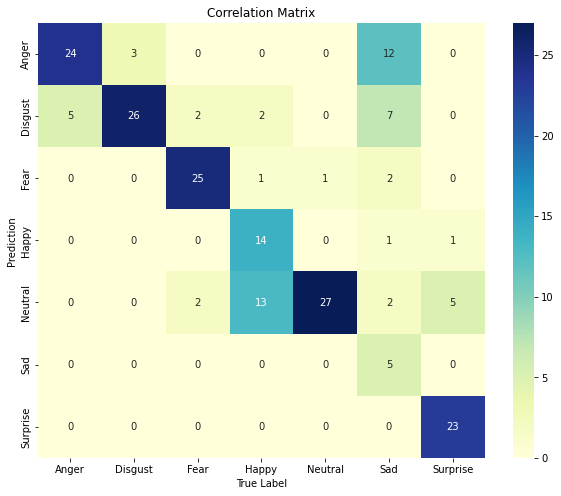

In [20]:
Emotion("Jaffe") #D-9